In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

df = pd.read_csv('./data/train_2.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 804 entries, Page to 2017-09-10
dtypes: float64(803), object(1)
memory usage: 889.8+ MB


In [3]:
data_start_date = df.columns[1]
data_end_date = df.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2015-07-01 to 2017-09-10


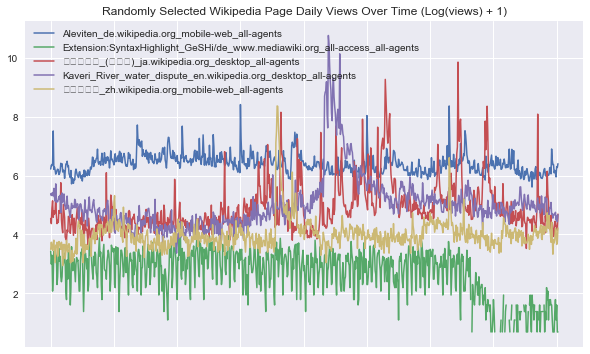

In [6]:
def plot_random_series(df, n_series):
    
    sample = df.sample(n_series, random_state=8)
    page_labels = sample['Page'].tolist()
    series_samples = sample.loc[:,data_start_date:data_end_date]
    
    plt.figure(figsize=(10,6))
    
    for i in range(series_samples.shape[0]):
        np.log1p(pd.Series(series_samples.iloc[i]).astype(np.float64)).plot(linewidth=1.5)
    
    plt.title('Randomly Selected Wikipedia Page Daily Views Over Time (Log(views) + 1)')
    plt.legend(page_labels)

plot_random_series(df, 5)

In [7]:
from datetime import timedelta

pred_steps = 14 // the length of series we are gonna predict
pred_length=timedelta(pred_steps)

first_day = pd.to_datetime(data_start_date) 
last_day = pd.to_datetime(data_end_date)

val_pred_start = last_day - pred_length + timedelta(1)
val_pred_end = last_day

train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(days=1)

In [8]:
encode_length = train_pred_start - first_day

train_encode_start = first_day
train_encode_end = train_encode_start + encode_length - timedelta(1)

val_encode_start = train_encode_start + pred_length
val_encode_end = val_encode_start + encode_length - timedelta(1)

In [9]:
print('Train encoding:', train_encode_start, '-', train_encode_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_encode_start, '-', val_encode_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', encode_length.days)
print('Prediction interval:', pred_length.days)

Train encoding: 2015-07-01 00:00:00 - 2017-08-13 00:00:00
Train prediction: 2017-08-14 00:00:00 - 2017-08-27 00:00:00 

Val encoding: 2015-07-15 00:00:00 - 2017-08-27 00:00:00
Val prediction: 2017-08-28 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 775
Prediction interval: 14


In [10]:
date_to_index = pd.Series(index=pd.Index([pd.to_datetime(c) for c in df.columns[1:]]),
                          data=[i for i in range(len(df.columns[1:]))])

series_array = df[df.columns[1:]].values
print('series_array shape:', series_array.shape)

series_array shape: (145063, 803)


In [11]:
print('date_to_index', date_to_index)

date_to_index 2015-07-01      0
2015-07-02      1
2015-07-03      2
2015-07-04      3
2015-07-05      4
2015-07-06      5
2015-07-07      6
2015-07-08      7
2015-07-09      8
2015-07-10      9
2015-07-11     10
2015-07-12     11
2015-07-13     12
2015-07-14     13
2015-07-15     14
2015-07-16     15
2015-07-17     16
2015-07-18     17
2015-07-19     18
2015-07-20     19
2015-07-21     20
2015-07-22     21
2015-07-23     22
2015-07-24     23
2015-07-25     24
2015-07-26     25
2015-07-27     26
2015-07-28     27
2015-07-29     28
2015-07-30     29
             ... 
2017-08-12    773
2017-08-13    774
2017-08-14    775
2017-08-15    776
2017-08-16    777
2017-08-17    778
2017-08-18    779
2017-08-19    780
2017-08-20    781
2017-08-21    782
2017-08-22    783
2017-08-23    784
2017-08-24    785
2017-08-25    786
2017-08-26    787
2017-08-27    788
2017-08-28    789
2017-08-29    790
2017-08-30    791
2017-08-31    792
2017-09-01    793
2017-09-02    794
2017-09-03    795
2017-09-04    

In [ ]:
def get_time_block_series(series_array, date_to_index, start_date, end_date):
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array